In [1]:
# 랑데부 논문 참고, min 대신 max 사용
# indel은 0, 변경엔 같으면 +1, 다르면 +0

import datetime
import requests
import pandas as pd
import numpy as np
import scipy.spatial.distance as ssd
from haversine import haversine
from tqdm import trange, notebook


df=pd.read_csv('5min_seq_trimmed_0301.csv')
df['trimmed'] = df.trimmed.apply(lambda x: x[1:-1].split(','))
arr=df.trimmed

df2=pd.read_csv('places_info_id_0224.csv',encoding='cp949')
tyid=df2['type_id']
tyid=list(tyid)
lat=df2['lat']
lat=list(lat)
lng=df2['lng']
lng=list(lng)

def levenshtein(arr1, arr2): 
    size_x = len(arr1) + 1   
    size_y = len(arr2) + 1
    matrix = np.zeros ((size_x+1, size_y+1))
    for x in range(size_x): 
        matrix [x+1, 0] = x
    for y in range(size_y):
        matrix [0, y+1] = y
        
    for x in range(2, size_x): 
        for y in range(2, size_y): 
            seq1=arr1[x-2]
            seq2=arr2[y-2]
            
            if (x-2)==0:
                seq1=seq1[1:7]
            else:
                seq1=seq1[2:8]

            if (y-2)==0:
                seq2=seq2[1:7]
            else:
                seq2=seq2[2:8]

            type_id1=seq1
            type_id2=seq2
            
            gps1=(lat[tyid.index(type_id1)],lng[tyid.index(type_id1)])
            gps2=(lat[tyid.index(type_id2)],lng[tyid.index(type_id2)])
            
            dist=haversine(gps1,gps2,unit='m')
            #print(dist)
            #print(type_id1+type_id2)
            distNum=0

            if dist<500:  
                matrix [x,y] = max(
                    matrix[x-1, y] ,#문자삭제
                    matrix[x-1, y-1]+1 ,   #문자변경
                    matrix[x, y-1],    #문자삽입
                    0
                )

            else :
                matrix [x,y] = max(   
                    matrix[x-1,y] ,
                    matrix[x-1,y-1],
                    matrix[x,y-1],
                    0
                )


            
    #print(matrix)  
    return (matrix[size_x - 1, size_y - 1])  # matrix에서 제일 오른쪽아래값을 출력해줌 


a=[]
for i in notebook.tqdm(range(len(arr))):
    result=[]
    for j in range(len(arr)):
        # print(levenshtein(arr[i],arr[j]))
        result.append(levenshtein(arr[i],arr[j]))
    #print(result)
    a.append(result)

print(a)

a=np.array(a)

distA_norm = a

for i in notebook.tqdm(range(len(arr))):
    for j in range(len(arr)):
        distA_norm[i][j]=(a[i][j]/(min(len(arr[i]),len(arr[j]))-1))
        
print(distA_norm)

for i in notebook.tqdm(range(len(arr))):
    for j in range(len(arr)):
        distA_norm[i][j] = 1-distA_norm[i][j]
        
print(distA_norm)

distArray=ssd.squareform(distA_norm)
print(distArray)


  0%|          | 0/300 [00:00<?, ?it/s]

[[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

  0%|          | 0/300 [00:00<?, ?it/s]

[[1.   0.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.25]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.   0.25 ... 0.   0.   1.  ]]


  0%|          | 0/300 [00:00<?, ?it/s]

[[0.   1.   1.   ... 1.   1.   1.  ]
 [1.   0.   1.   ... 1.   1.   1.  ]
 [1.   1.   0.   ... 1.   1.   0.75]
 ...
 [1.   1.   1.   ... 0.   1.   1.  ]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   1.   0.75 ... 1.   1.   0.  ]]
[1. 1. 1. ... 1. 1. 1.]


[[ 15.          23.           0.           2.        ]
 [ 63.          68.           0.           2.        ]
 [  1.           4.           0.           2.        ]
 ...
 [587.         593.           3.56893417 122.        ]
 [594.         596.           5.07337878 243.        ]
 [595.         597.           6.6702307  300.        ]]


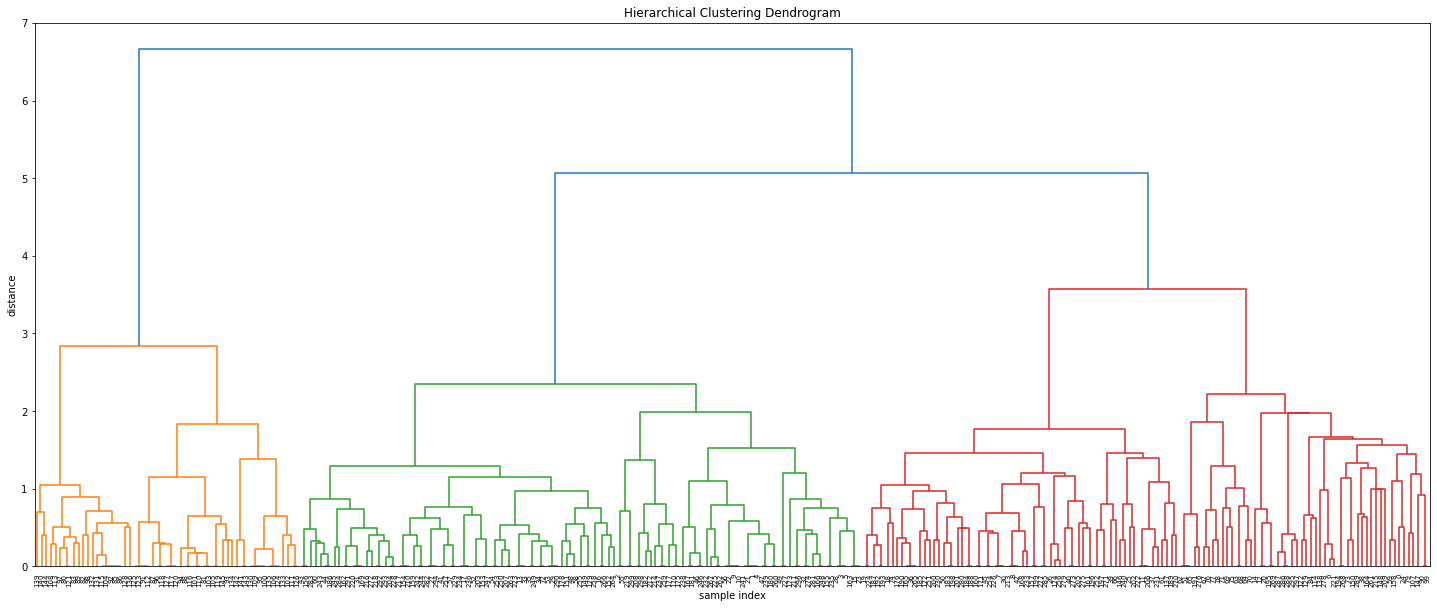

In [47]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cut_tree
from scipy.spatial.distance import pdist
import numpy as np


#가장 정확?
result = linkage(distArray, 'ward')
print(result)
# Ward Linkage — Uses the analysis of variance method to determine the distance between clusters
# 클러스터 내의 분산을 최소화하기 위한 방법으로, 
# 가중 거리를 계산하면서 군집 결합도를 빼주는 방식으로 두 군집 간의 거리를 정의한다. 
# 군집 중심 사이의 가중 제곱 거리를 최소화하는 방식으로 계산한다.

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#plt.axhline(y=326.5, c='k')
dendrogram(
    result,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=7.,  # font size for the x axis labels
)
# plt.axhline(y=25, c='k')
plt.show()

In [10]:
avg_sil=[]
for i in range(6, 300):
    cluster_info = cut_tree(result, i).flatten()
    
    print("Cluster # : "+str(i))
    
    for i in range(len(cluster_info)):
        cluster_info[i]=cluster_info[i]+1

        
        #df['cluster'] = cluster_info
    
    from sklearn import metrics
    nodes = cluster_info
    a = ssd.squareform(distArray)
    average_score = metrics.silhouette_score(a, nodes, metric='precomputed')
    print(average_score)
    avg_sil.append(average_score)
    #a = ssd.squareform(distArray)
    #score_samples = metrics.silhouette_samples(a, nodes, metric='precomputed')
    #df['silhouette_coeff'] = score_samples

    #df.groupby('cluster')['silhouette_coeff'].mean()
    
    
    

Cluster # : 6
0.13569504557975037
Cluster # : 7
0.14395345014918215
Cluster # : 8
0.14225885426878662
Cluster # : 9
0.1515241084650415
Cluster # : 10
0.1623065181292194
Cluster # : 11
0.1668561288881662
Cluster # : 12
0.16524021864734423
Cluster # : 13
0.16751029612628904
Cluster # : 14
0.1738352086888281
Cluster # : 15
0.18092586387292817
Cluster # : 16
0.18386772658014106
Cluster # : 17
0.18070743869053169
Cluster # : 18
0.1845028455936598
Cluster # : 19
0.1816415550368685
Cluster # : 20
0.1853426793239208
Cluster # : 21
0.18970238968462827
Cluster # : 22
0.1943518494714546
Cluster # : 23
0.19316030450613586
Cluster # : 24
0.1967061946824375
Cluster # : 25
0.197645066303067
Cluster # : 26
0.18817658941225857
Cluster # : 27
0.19033817126608843
Cluster # : 28
0.19442005115767708
Cluster # : 29
0.19617865279755795
Cluster # : 30
0.20016971957006913
Cluster # : 31
0.2053583913037307
Cluster # : 32
0.19964856341827802
Cluster # : 33
0.1970014447282026
Cluster # : 34
0.20393394079508104
Cl

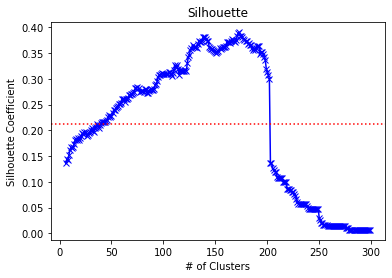

In [13]:
import matplotlib.pyplot as plt

avg_sil_ = np.mean(avg_sil)

plt.plot(range(6,300), avg_sil, 'bx-')
plt.axhline(y=avg_sil_, color='r', linestyle='dotted')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette')
plt.show()

In [14]:
print(avg_sil_)
print(np.min(avg_sil))
print(np.max(avg_sil))

0.2127509735655432
0.006666666666666667
0.39049219529562673


In [62]:
clst1 = []
clst2 = []
clst3 = []
clst4 = []
clst5 = []
clst6 = []


for i in range(len(cluster_info)):
    if cluster_info[i] == 1:
        clst1.append(i)
    elif cluster_info[i] == 2:
        clst2.append(i)
    elif cluster_info[i] == 3:
        clst3.append(i)
    elif cluster_info[i] == 4:
        clst4.append(i)
    elif cluster_info[i] == 5:
        clst5.append(i)
    elif cluster_info[i] == 6:
        clst6.append(i)



print(len(clst1))
print(len(clst2))
print(len(clst3))
print(len(clst4))
print(len(clst5))
print(len(clst6))

195
723
777
412
423
252


In [46]:
for i in clst1:
    print(arr[i])  

["'Ta0001'", " 'Ta0002'", " 'Ta0003'"]
["'Rx0023'", " 'Ux0004'", " 'Sm0001'"]
["'Sx0016'", " 'Ux0004'", " 'Rx0004'"]
["'Ux0004'", " 'Rx0004'"]
["'Ux0004'", " 'St0001'"]
["'Ux0004'", " 'Cx0001'"]
["'Ux0004'", " 'Sx0032'", " 'Bs0004'"]
["'Rx0003'", " 'Sx0001'", " 'Rx0004'"]
["'Rx0040'", " 'Sx0248'", " 'Rx0040'"]
["'Sx0035'", " 'Rx0004'", " 'St0004'"]
["'Rx0069'", " 'Sx0051'", " 'Ux0004'"]
["'Ux0003'", " 'Sx0001'"]
["'Ux0004'", " 'Ux0020'", " 'Ux0008'"]
["'Sx0076'", " 'Rx0039'", " 'Ta0019'"]
["'Rx0164'", " 'Lx0026'", " 'Sx0087'"]
["'Rx0160'", " 'Sx0125'", " 'Sx0087'"]
["'Ux0035'", " 'Ux0007'", " 'Ux0008'"]
["'St0004'", " 'Sx0001'", " 'Rx0239'"]
["'Sx0002'", " 'Lx0005'", " 'Ux0003'"]
["'Lx0052'", " 'Tg0001'", " 'Bs0030'"]
["'Rx0003'", " 'Sx0001'", " 'Rx0004'"]
["'Rx0004'", " 'Ux0004'", " 'Tx0021'"]
["'Sm0001'", " 'Ux0004'", " 'Rx0004'"]
["'Tg0001'", " 'Ux0004'", " 'Rx0004'"]
["'Sx0033'", " 'Rx0025'", " 'Sx0045'"]
["'Rx0314'", " 'Kx0002'", " 'Rx0025'"]
["'Ux0007'", " 'Sx0001'", " 'Ux0075'"]

In [47]:
for i in clst2:
    print(arr[i])  

["'Bs0001'", " 'Ux0001'", " 'Kx0001'", " 'Ux0001'"]
["'Ux0003'", " 'Sx0042'", " 'Sx0001'", " 'Sx0002'"]
["'Ux0004'", " 'Rx0029'", " 'Ux0004'", " 'Ux0008'"]
["'Rx0021'", " 'Ux0004'", " 'Mx0001'", " 'Sm0001'"]
["'Sx0001'", " 'Rx0004'", " 'Sx0045'", " 'Rx0313'"]
["'Sx0033'", " 'Sx0001'", " 'Ux0013'", " 'Ux0007'"]
["'Sx0002'", " 'Lx0005'", " 'Ux0004'", " 'Ux0003'"]
["'Ux0004'", " 'Sx0059'", " 'Rx0077'", " 'Sx0001'"]
["'Rx0078'", " 'Rx0087'", " 'Rx0088'", " 'Rx0089'"]
["'Ta0015'", " 'Rx0093'", " 'Ux0021'", " 'Sx0068'"]
["'Rx0110'", " 'Rx0111'", " 'Sx0074'", " 'Rx0111'"]
["'Tg0004'", " 'Rx0110'", " 'Lx0022'", " 'Rx0104'"]
["'Sx0085'", " 'Sx0086'", " 'Sx0087'", " 'Sx0088'"]
["'Lx0026'", " 'Rx0128'", " 'Lx0027'", " 'Sx0087'"]
["'Rx0119'", " 'Rx0147'", " 'Lx0023'", " 'Sx0087'"]
["'Rx0148'", " 'Rx0149'", " 'Rx0119'", " 'Sm0003'"]
["'Sx0090'", " 'Sx0112'", " 'Sm0003'", " 'Tx0004'"]
["'Rx0160'", " 'Sx0115'", " 'Rx0136'", " 'Sx0087'"]
["'Sx0090'", " 'Rx0160'", " 'Sx0098'", " 'Rx0120'"]
["'Lx0026'",

In [48]:
for i in clst3:
    print(arr[i])  

["'Ux0002'", " 'Rx0001'", " 'Rx0002'", " 'Lx0001'", " 'Ux0001'"]
["'Rx0003'", " 'Sx0003'", " 'Sx0004'", " 'Sx0138'", " 'Ux0004'", " 'Rx0004'"]
["'Rx0022'", " 'Bs0003'", " 'Lx0005'", " 'Ux0007'", " 'Ux0004'", " 'Bs0003'"]
["'Rx0004'", " 'Sx0013'", " 'Ux0004'", " 'Rx0024'", " 'Sx0014'", " 'Sx0015'"]
["'Rx0026'", " 'Rx0027'", " 'Rx0028'", " 'Sx0015'", " 'Sx0019'"]
["'Sx0022'", " 'Rx0030'", " 'Rx0026'", " 'Rx0037'", " 'Cs0001'"]
["'Ux0010'", " 'Tg0001'", " 'Sx0001'", " 'Mx0006'", " 'Ux0011'"]
["'Rx0312'", " 'Sx0012'", " 'Sx0005'", " 'Sx0001'", " 'Rx0239'"]
["'Sx0001'", " 'Rx0005'", " 'Cx0001'", " 'Ux0004'", " 'Sx0031'", " 'St0004'"]
["'Ux0004'", " 'Bs0001'", " 'Ux0007'", " 'Sx0245'", " 'Ux0007'", " 'Rx0007'"]
["'Ux0007'", " 'Ux0004'", " 'Sx0034'", " 'Ux0007'", " 'Rx0313'"]
["'Ux0004'", " 'Sx0036'", " 'Ux0004'", " 'Ux0013'", " 'Rx0314'", " 'Rx0025'"]
["'Ux0005'", " 'Rx0007'", " 'Ux0014'", " 'Rx0076'", " 'Xx0001'", " 'Rx0021'"]
["'Ux0016'", " 'Rx0040'", " 'Ux0004'", " 'Rx0040'", " 'Sx0046'",

In [49]:
for i in clst4:
    print(arr[i])  

["'Ux0005'", " 'Rx0005'", " 'Ux0004'", " 'Sx0234'", " 'Sx0005'", " 'Rx0006'", " 'Lx0005'", " 'Rx0007'"]
["'Rx0025'", " 'Sx0001'", " 'Sx0017'", " 'Sx0018'", " 'Ux0004'", " 'Mx0001'", " 'Cx0001'"]
["'Rx0046'", " 'Ux0048'", " 'Ux0012'", " 'Ta0010'", " 'Rx0047'", " 'Sx0027'", " 'Rx0030'", " 'Rx0048'"]
["'Sx0042'", " 'Rx0062'", " 'Rx0063'", " 'Bs0004'", " 'Sx0156'", " 'Lx0009'", " 'Lx0010'"]
["'Ux0007'", " 'Ta0011'", " 'Ta0012'", " 'Ta0013'", " 'Ta0011'", " 'Xx0003'", " 'Rx0067'"]
["'Rx0068'", " 'Lx0012'", " 'Sx0046'", " 'Sx0176'", " 'Ux0004'", " 'Ux0007'", " 'Rx0040'"]
["'Rx0072'", " 'Ux0004'", " 'Sx0052'", " 'Xx0004'", " 'Ux0004'", " 'Sx0053'", " 'Ux0019'"]
["'Ta0015'", " 'Rx0078'", " 'Sx0060'", " 'Sx0061'", " 'Sx0062'", " 'Rx0079'", " 'Rx0080'"]
["'Ta0015'", " 'Rx0083'", " 'Rx0084'", " 'Rx0085'", " 'Sx0014'", " 'Rx0086'", " 'Sx0065'"]
["'Rx0093'", " 'Ux0024'", " 'Rx0094'", " 'Ux0025'", " 'Rx0095'", " 'Rx0096'", " 'Rx0097'", " 'Rx0098'"]
["'Sx0076'", " 'Tg0003'", " 'Tg0004'", " 'Sx0081'",

In [50]:
for i in clst5:
    print(arr[i])  

["'Lx0002'", " 'Ta0004'", " 'Ta0005'", " 'Ta0006'", " 'Rx0008'", " 'Ta0007'", " 'Rx0009'", " 'Rx0010'", " 'Rx0011'", " 'Sx0006'", " 'Lx0003'", " 'Sx0007'"]
["'Kx0003'", " 'Sx0012'", " 'Tx0001'", " 'Lx0004'", " 'Ag0001'", " 'Ux0004'", " 'Rx0020'", " 'Sx0198'", " 'Ux0006'", " 'Rx0021'"]
["'Rx0003'", " 'Sx0001'", " 'Ux0009'", " 'Mx0001'", " 'Ux0004'", " 'Bs0004'", " 'Sx0020'", " 'Ux0004'", " 'Ux0007'"]
["'Rx0030'", " 'Rx0307'", " 'Rx0031'", " 'Rx0032'", " 'Bs0005'", " 'Rx0033'", " 'Sx0021'", " 'Rx0034'", " 'Rx0035'", " 'Rx0036'", " 'Rx0012'", " 'Rx0006'"]
["'Rx0003'", " 'Sx0001'", " 'Rx0004'", " 'Rx0025'", " 'Rx0004'", " 'Ux0004'", " 'Sx0033'", " 'Rx0004'", " 'Ux0004'", " 'Sx0001'"]
["'Ux0007'", " 'Rx0050'", " 'Ux0004'", " 'Sx0045'", " 'Ux0004'", " 'Rx0003'", " 'Sx0035'", " 'Ux0004'", " 'Ux0013'"]
["'Ux0004'", " 'Rx0012'", " 'Rx0026'", " 'Bs0007'", " 'Sx0037'", " 'Kx0005'", " 'Rx0051'", " 'Rx0052'", " 'Sx0038'", " 'Rx0053'", " 'Rx0054'"]
["'Sx0033'", " 'Rx0025'", " 'Ux0004'", " 'Sx0001'",

In [51]:
for i in clst6:
    print(arr[i])  

["'Sx0001'", " 'Ux0004'", " 'Sx0001'", " 'Sx0008'", " 'Rx0012'", " 'Sx0009'", " 'Sx0236'", " 'Rx0013'", " 'Bs0002'", " 'Ta0008'", " 'Rx0014'", " 'Rx0015'", " 'Rx0016'", " 'Rx0017'", " 'Rx0302'", " 'Sx0011'", " 'Ux0047'", " 'Rx0018'", " 'Rx0014'", " 'Rx0303'", " 'Ta0009'", " 'Qx0001'", " 'Sx0238'", " 'Rx0019'", " 'Kx0002'"]
["'Rx0038'", " 'Ux0004'", " 'Bs0006'", " 'Rx0039'", " 'Sx0023'", " 'Ux0004'", " 'Ux0011'", " 'Lx0005'", " 'Sx0013'", " 'Ux0004'", " 'Rx0040'", " 'Sx0001'", " 'Cx0001'", " 'Ux0004'", " 'Sx0012'", " 'Sx0005'"]
["'Ux0008'", " 'Kx0004'", " 'Ux0007'", " 'Xx0001'", " 'Sx0241'", " 'Sx0024'", " 'Rx0041'", " 'St0002'", " 'Rx0309'", " 'Rx0042'", " 'Rx0310'", " 'Rx0043'", " 'Rx0044'", " 'Sx0026'", " 'Sx0025'", " 'Sx0026'", " 'Rx0045'"]
["'Rx0046'", " 'Rx0049'", " 'Sx0242'", " 'Tg0002'", " 'Sx0243'", " 'Sx0028'", " 'Xx0002'", " 'Lx0006'", " 'Sx0244'", " 'Sx0029'", " 'Rx0031'", " 'Rx0030'", " 'Sx0030'"]
["'Sx0039'", " 'Kx0006'", " 'Bs0036'", " 'Nc0001'", " 'Rx0055'", " 'Rx0056'",

In [38]:
# intra-cluster distance
sum=0
for i in range(1,(len(arr)-1),1):
    for j in range(i+1,len(arr),1):
        a1 = index[i]
        a2 = index[j]
        sum+=distA_norm[a1][a2]
        
sum = sum*2/((len(arr)-1)*len(arr))
print(sum)

1.2699444885011895


In [109]:
cluster_info = cut_tree(result, 5).flatten()
    
#print("Cluster # : "+str(6))
    
for i in range(len(cluster_info)):
    if(cluster_info[i] == 0):
        cluster_info[i] = 1
    elif(cluster_info[i] == 1):
        cluster_info[i] = 2
    elif(cluster_info[i] == 2):
        cluster_info[i] = 3
    elif(cluster_info[i] == 3):
        cluster_info[i] = 4
    elif(cluster_info[i] == 4):
        cluster_info[i] = 5
    elif(cluster_info[i] == 5):
        cluster_info[i] = 6
        
            
df['cluster'] = cluster_info
df.to_csv('max_cluster_info_7.csv')
print(cluster_info)

clu_num=df['cluster']
clu_num=list(clu_num)
print(clu_num)
total_sum=0
        
for j in range(1,6):
    index_=[]
    for k in range(247):
        if clu_num[k]==j:
            index_.append(k)
            
        sum=0
    print(index_)
    for p in range(0,len(index_),1):
        for q in range(p+1, len(index_),1):
            a1=index_[p]
            a2=index_[q]
            sum+=distA_norm[a1][a2]
    print(sum)
    sum=sum*2/((len(index_)-1)*len(index_))
    print(str(j)+' '+str(sum))
    total_sum+=sum
total_sum=total_sum/5
print("Intra-cluster Distance when Cluster # is "+str(5)+" : "+str(total_sum))


[1 2 1 2 1 3 4 2 4 1 1 1 1 3 2 2 2 1 1 1 2 1 1 1 1 4 4 4 4 2 4 2 2 2 2 2 5
 5 5 5 2 4 5 2 2 2 2 2 2 4 4 4 2 4 2 4 4 2 2 2 2 3 3 3 3 2 2 2 4 1 1 1 1 1
 1 1 2 2 2 2 2 5 5 5 5 5 5 5 5 5 4 4 4 4 3 3 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2
 4 4 4 2 3 3 2 2 3 3 5 3 3 3 5 4 5 2 2 4 4 4 4 1 3 3 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 5 2 3 2 2 5 2 2 3 4 2 2 2 2 2 2 2 2 2 5 2 3 2 2 3 2 2 3 3 3
 3 3 2 3 2 3 3 2 3 2 4 4 2 2 2 2 2 2 2 4 2 2 3 5 2 2 2 3 2 2 2 2 2 2 2 2 4
 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 1 3 2 3 2 2 1 2]
[1, 2, 1, 2, 1, 3, 4, 2, 4, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 4, 5, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 3, 3, 2, 2, 3, 3, 5, 3, 3, 3, 5, 4, 5, 2, 2, 4, 4, 4, 4, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 5, 2, 3, 2, 2, 5, 2, 2, 3, 4, 2,

In [16]:
intra_clu=[]
for m in range(1, 301):
    cluster_info = cut_tree(result, m).flatten()
    
    print("Cluster # : "+str(m))
    
    for i in range(len(cluster_info)):
        cluster_info[i]=cluster_info[i]+1
    #df['cluster'] = cluster_info
    #df.to_csv('max_cluster_info_7.csv')
    #print(cluster_info)

    clu_num=cluster_info
    clu_num=list(clu_num)
    #print(clu_num)
    total_sum=0
        
    for j in range(1,m+1):
        index_=[]
        for k in range(300):
            if clu_num[k]==j:
                index_.append(k)
            
            sum=0
        #print(index_)
        for p in range(0,len(index_),1):
            for q in range(p+1, len(index_),1):
                a1=index_[p]
                a2=index_[q]
                sum+=distA_norm[a1][a2]
        if len(index_)>1:
            sum=sum*2/((len(index_)-1)*len(index_))
        else:
            sum=0
        #sum=sum*2/((len(index_)-1)*len(index_))
        #print(str(j)+' '+str(sum))
        total_sum+=sum
    total_sum=total_sum/m
    intra_clu.append(total_sum)
    print("Intra-cluster Distance when Cluster # is "+str(m)+" : "+str(total_sum))

print(intra_clu)

Cluster # : 1
Intra-cluster Distance when Cluster # is 1 : 0.7931532376283726
Cluster # : 2
Intra-cluster Distance when Cluster # is 2 : 0.6380484108027087
Cluster # : 3
Intra-cluster Distance when Cluster # is 3 : 0.6055813051869158
Cluster # : 4
Intra-cluster Distance when Cluster # is 4 : 0.6304433650651445
Cluster # : 5
Intra-cluster Distance when Cluster # is 5 : 0.5646348877561286
Cluster # : 6
Intra-cluster Distance when Cluster # is 6 : 0.5311593493790595
Cluster # : 7
Intra-cluster Distance when Cluster # is 7 : 0.5595800672377401
Cluster # : 8
Intra-cluster Distance when Cluster # is 8 : 0.5328390947077852
Cluster # : 9
Intra-cluster Distance when Cluster # is 9 : 0.5148976234493596
Cluster # : 10
Intra-cluster Distance when Cluster # is 10 : 0.48734029436838877
Cluster # : 11
Intra-cluster Distance when Cluster # is 11 : 0.4607803464360521
Cluster # : 12
Intra-cluster Distance when Cluster # is 12 : 0.4407508398042843
Cluster # : 13
Intra-cluster Distance when Cluster # is 1

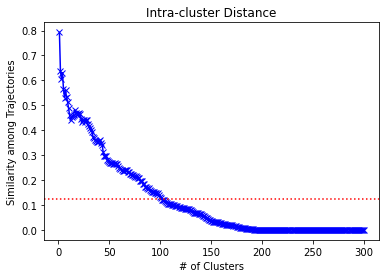

In [21]:
import matplotlib.pyplot as plt


plt.plot(range(1,301), intra_clu, 'bx-')
plt.axhline(y=avg, color='r', linestyle='dotted')
plt.xlabel('# of Clusters')
plt.ylabel('Similarity among Trajectories')
plt.title('Intra-cluster Distance')
plt.show()

In [20]:
avg = np.mean(intra_clu)
print(avg)

0.12283242042544863


In [22]:
print(avg)
print(np.min(intra_clu))
print(np.max(intra_clu))

0.12283242042544863
0.0
0.7931532376283726


In [35]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [36]:
from sklearn import metrics
nodes = cluster_info
a = ssd.squareform(distArray)
average_score = metrics.silhouette_score(a, nodes, metric='precomputed')
print(average_score)
a = ssd.squareform(distArray)
score_samples = metrics.silhouette_samples(a, nodes, metric='precomputed')
df2['silhouette_coeff'] = score_samples

pd.DataFrame(df2.groupby('cluster')['silhouette_coeff'].mean())

# df.to_csv('5min_seq_trimmed_clst.csv')

0.39049219529562673


C:\Users\minsk\AppData\Local\Temp/ipykernel_3028/1257661803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['silhouette_coeff'] = score_samples


,silhouette_coeff
cluster,
1,0.00000
2,0.50000
3,0.50000
4,0.33333
5,0.63636
6,0.66667
7,0.33333
8,0.75000
9,0.66667
